In [71]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
x_train[10:100].shape

2.7.0
(60000, 28, 28)
(10000, 28, 28)


(90, 28, 28)

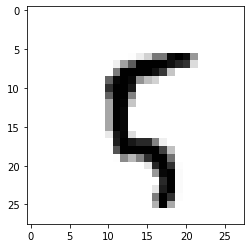

In [70]:
plt.imshow(x_train[100], cmap=plt.cm.binary)
plt.show()

In [36]:
y_train[2] # 슬라이싱([:5])이 안되는 이유??

4

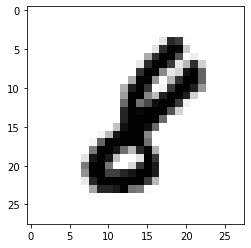

10002 번째 이미지의 숫자는 바로  8 입니다.


In [38]:
index=10001
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [39]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [52]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [53]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

2022-01-04 16:01:53.589373: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-04 16:01:53.589543: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model에 추가된 Layer 개수:  7


In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [56]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다. (한 개만 설정 가능)
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [58]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
  12/1875 [..............................] - ETA: 17s - loss: 0.0208 - accuracy: 0.9948

2022-01-04 16:10:11.702075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 15s 8ms/step - loss: 0.0113 - accuracy: 0.9963
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0097 - accuracy: 0.9966
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0079 - accuracy: 0.9976
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0075 - accuracy: 0.9978
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0067 - accuracy: 0.9980
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0063 - accuracy: 0.9980
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0065 - accuracy: 0.9978
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0049 - accuracy: 0.9985
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0054 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0047

In [59]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

2022-01-04 16:12:34.380295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.0420 - accuracy: 0.9894 - 1s/epoch - 5ms/step
test_loss: 0.042020704597234726 
test_accuracy: 0.9894000291824341


In [61]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

2022-01-04 16:12:35.801499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


model.predict() 결과 :  [6.3253000e-18 9.7387335e-14 1.1815728e-18 1.9847211e-13 2.0901950e-12
 4.4135937e-20 1.9065610e-23 1.0000000e+00 1.1359865e-16 5.2073153e-14]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7
model.predict() 결과 :  [6.3253000e-18 9.7387335e-14 1.1815728e-18 1.9847211e-13 2.0901950e-12
 4.4135937e-20 1.9065610e-23 1.0000000e+00 1.1359865e-16 5.2073153e-14]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


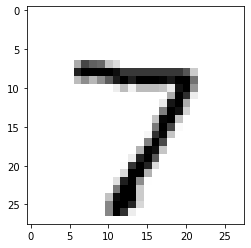

In [62]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [3.1424496e-25 2.1475197e-11 3.0178091e-21 9.9999738e-01 1.8235574e-17
 2.5868342e-06 2.3579184e-19 4.1183059e-24 1.4750997e-09 9.7770869e-13]
라벨: 5, 예측결과: 3


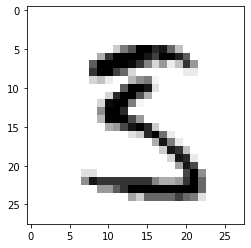

예측확률분포: [1.5355365e-27 1.0362805e-16 4.2189893e-26 1.2745480e-01 4.0366300e-19
 8.7254524e-01 3.1824372e-20 1.8129704e-25 3.6410125e-13 5.6904120e-10]
라벨: 3, 예측결과: 5


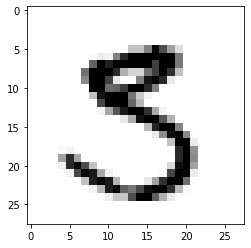

예측확률분포: [1.0360675e-15 2.9910914e-09 9.2632198e-01 7.3377505e-02 9.0773387e-16
 7.5974104e-15 1.0453454e-20 3.0036905e-04 1.4082791e-07 1.6488342e-18]
라벨: 3, 예측결과: 2


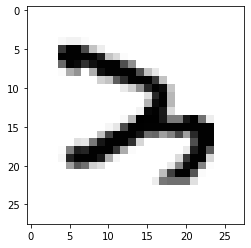

예측확률분포: [2.9562937e-08 1.0244348e-06 4.0099177e-08 1.7086217e-08 8.3358639e-01
 8.0024459e-11 1.2684257e-11 2.8789375e-04 3.5038448e-04 1.6577432e-01]
라벨: 9, 예측결과: 4


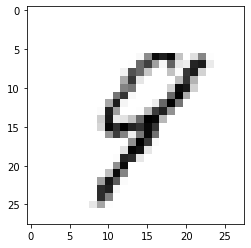

예측확률분포: [1.6835469e-06 9.9997401e-01 1.9311447e-07 4.3312392e-11 1.2109839e-09
 1.9866299e-07 2.3708653e-05 1.4485657e-08 1.1157866e-07 2.9228584e-12]
라벨: 6, 예측결과: 1


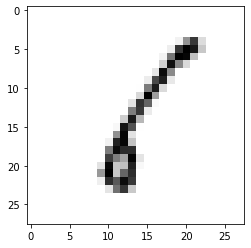

In [63]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [64]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=64
n_channel_2=128
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

2022-01-04 16:14:22.506867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 19s 10ms/step - loss: 0.1287 - accuracy: 0.9608
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0430 - accuracy: 0.9870
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0278 - accuracy: 0.9912
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0153 - accuracy: 0.9947
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0121 - accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0094 - accuracy: 0.9968
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0089 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/step - lo

2022-01-04 16:17:35.019066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 - 2s - loss: 0.0397 - accuracy: 0.9898 - 2s/epoch - 8ms/step
test_loss: 0.03974749520421028 
test_accuracy: 0.9898000359535217
